<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
!pip install category_encoders -q
!pip install ydata_profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import re
from category_encoders.target_encoder import TargetEncoder

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Необходимо фиксировать сиды для того, чтобы можно было контролировать случайность и чтобы мы смогли получать воспроизводимый результат при каждом запуске модели.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [4]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [5]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [6]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [7]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [8]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Да, в датасете df_train есть пропуски в следующих колонках:
- max_power (196 пропусков);
- mileage, engine и seats (202 пропусков);
- torque (203 пропусков).

Да, в датасете df_test есть пропуски в следующих колонках:
- mileage, engine, seats, max_power и torque (19 пропусков в каждой).

In [9]:
duplicates = df_train.duplicated().sum()
duplicates

985

In [10]:
df_train = df_train.drop_duplicates()
df_train.shape

(6014, 13)

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        5824 non-null   object 
 9   engine         5824 non-null   object 
 10  max_power      5827 non-null   object 
 11  torque         5823 non-null   object 
 12  seats          5824 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 657.8+ KB


In [12]:
df_train[['mileage', 'engine', 'max_power', 'seats', 'torque']].head()

mileage   engine   max_power  seats                    torque
0   23.4 kmpl  1248 CC      74 bhp    5.0            190Nm@ 2000rpm
1  21.14 kmpl  1498 CC  103.52 bhp    5.0       250Nm@ 1500-2500rpm
2   23.0 kmpl  1396 CC      90 bhp    5.0  22.4 kgm at 1750-2750rpm
3   16.1 kmpl  1298 CC    88.2 bhp    5.0     11.5@ 4,500(kgm@ rpm)
4  20.14 kmpl  1197 CC   81.86 bhp    5.0         113.75nm@ 4000rpm

В столбце `mileage` типа `object` явно стоят чисовые значения с единицей измерения, поэтому при помощи регулярных выражений превратим этот столбец в числовой и заполним медианой пропуски. В данном столбце встречаются одновременно две единицы измерения - 'kmpl'(km per litre) и 'km/kg'(km per kg). Будем считать, что 1 литр ≈ 1 кг, поэтому просто удалим все единицы измерения без вычислений.

In [13]:
pattern = r'kmpl|km\/kg'
df_train['mileage'] = df_train['mileage'].apply(lambda x: np.where(x!='NaN', re.sub(pattern, '', str(x)), 'NaN'))
df_train['mileage'] = df_train['mileage'].astype(float)
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())

То же самое можно пронаблюдать в столбце в столбце 'max_power'. Преобразуем его до числового и заполним пропуски средним.

In [14]:
pattern = r'bhp'
df_train['max_power'] = df_train['max_power'].apply(lambda x: re.sub(pattern, '', str(x)))
df_train['max_power'] = df_train['max_power'].apply(lambda x: 'NaN' if x.strip()=='' else x)
df_train['max_power'] = df_train['max_power'].astype(float)
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())

Столбец значение 'CC' в столбце 'engine' - это 'Cubic capacity', то удалим регуляркой, чтобы все значения были числовыми, заполним медианой пропуски.

In [15]:
pattern = r'CC'
df_train['engine'] = df_train['engine'].apply(lambda x: np.where(x!='NaN', re.sub(pattern, '', str(x)).strip(), 'NaN'))
df_train['engine'] = df_train['engine'].astype(float)
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())

Столбец 'seats' типа 'float', поэтому сразу заполним пропуски медианой.

In [16]:
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())

Заглянув в будущее понял, что столбец 'torque' все равно будет удален, поэтому сначала заполним значением моды пропуски, а затем закодируем его при помощи TargetEncoder со сглаживанием.

In [17]:
df_train['torque'] = df_train['torque'].fillna(df_train['torque'].mode()[0])
tgt_enc = TargetEncoder(smoothing=2)
df_train['torque'] = tgt_enc.fit_transform(df_train['torque'], df_train['selling_price'])

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        6014 non-null   float64
 9   engine         6014 non-null   float64
 10  max_power      6014 non-null   float64
 11  torque         6014 non-null   float64
 12  seats          6014 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 657.8+ KB


Как мы видим, пропусков в нашем датасете теперь нет, остаются категориальные переменные, которые мы закодируем в следующих пунктах.

Построим дашборд при помощи ydata-profiling.

In [19]:
profile_report = ProfileReport(df_train, title='Pandas Profiling Report')

In [20]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
profile_report.to_file('CarPricePrediction.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [22]:
X = df_train.drop(['selling_price'], axis=1)
y = df_train['selling_price']

In [23]:
duplicates = X[X.duplicated(keep=False)]
duplicates

name  year  km_driven    fuel  \
22                      Maruti Baleno Delta 1.2  2016      45000  Petrol   
26                  Maruti Omni E MPI STD BS IV  2018      25000  Petrol   
27              Maruti Vitara Brezza LDi Option  2017      70000  Diesel   
72    Ford EcoSport 1.5 TDCi Titanium Plus BSIV  2015      90000  Diesel   
93                             Maruti Swift VXI  2019      10000  Petrol   
...                                         ...   ...        ...     ...   
6906                           Maruti Swift VDI  2012      90000  Diesel   
6946                     Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6947                     Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6981   Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6984   Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   

     seller_type transmission         owner  mileage  engine  max_power  \
22    Individual       Manual   First Owner    21.40  1197.0      83.10   
26    Individual       Manual   First Owner    16.80   796.0      34.20   
27    Individual       Manual   First Owner    24.30  1248.0      88.50   
72    Individual       Manual   First Owner    22.77  1498.0      98.59   
93    Individual       Manual   First Owner    21.21  1197.0      81.80   
...          ...          ...           ...      ...     ...        ...   
6906  Individual       Manual  Second Owner    22.90  1248.0      74.00   
6946  Individual       Manual  Second Owner    18.00   995.0      62.00   
6947  Individual       Manual  Second Owner    18.00   995.0      62.00   
6981  Individual       Manual   First Owner    24.40  1498.0      98.63   
6984  Individual       Manual   First Owner    24.40  1498.0      98.63   

             torque  seats  
22    589385.911658    5.0  
26     97171.602273    8.0  
27    700118.450867    5.0  
72    789830.132661    5.0  
93    570219.439024    5.0  
...             ...    ...  
6906  401722.000000    5.0  
6946  125352.237479    5.0  
6947  125352.237479    5.0  
6981  550022.776339    5.0  
6984  550022.776339    5.0  

[338 rows x 12 columns]

In [24]:
X = X.drop_duplicates()

In [25]:
remaining_indices = X.index
y_filtered = y.loc[remaining_indices].reset_index(drop=True)

In [26]:
result = pd.concat([X.reset_index(drop=True), y_filtered], axis=1)

In [27]:
df_train = result.copy()

In [28]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   float64
 9   max_power      5840 non-null   float64
 10  torque         5840 non-null   float64
 11  seats          5840 non-null   float64
 12  selling_price  5840 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 593.2+ KB


Единицы измерения в столбцах ``mileage, engine, max_power`` уже были убраны в предыдущих пунктах, также данные признаки были приведены к типу float.

Удалим столбец `torque`.

In [30]:
df_train = df_train.drop(['torque'], axis=1)

Теперь сделаем предобработку данных для `data_test.`

In [31]:
df_test = df_test.drop_duplicates()
pattern1 = r'kmpl|km\/kg'
df_test['mileage'] = df_test['mileage'].apply(lambda x: np.where(x!='NaN', re.sub(pattern1, '', str(x)), 'NaN'))
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['mileage'] = df_test['mileage'].fillna(df_test['mileage'].median())
pattern2 = r'bhp'
df_test['max_power'] = df_test['max_power'].apply(lambda x: re.sub(pattern2, '', str(x)))
df_test['max_power'] = df_test['max_power'].apply(lambda x: 'NaN' if x.strip()=='' else x)
df_test['max_power'] = df_test['max_power'].astype(float)
df_test['max_power'] = df_test['max_power'].fillna(df_test['max_power'].median())
pattern3 = r'CC'
df_test['engine'] = df_test['engine'].apply(lambda x: np.where(x!='NaN', re.sub(pattern3, '', str(x)).strip(), 'NaN'))
df_test['engine'] = df_test['engine'].astype(float)
df_test['engine'] = df_test['engine'].fillna(df_test['engine'].median())
df_test['seats'] = df_test['seats'].fillna(df_test['seats'].median())
df_test = df_test.drop(['torque'], axis=1)
X = df_test.drop(['selling_price'], axis=1)
y = df_test['selling_price']
remaining_indices = X.index
y_filtered = y.loc[remaining_indices].reset_index(drop=True)
result = pd.concat([X.reset_index(drop=True), y_filtered], axis=1)
df_test = result.copy()

<ipython-input-31-6afcc29e2684>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['mileage'] = df_test['mileage'].apply(lambda x: np.where(x!='NaN', re.sub(pattern1, '', str(x)), 'NaN'))
<ipython-input-31-6afcc29e2684>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['mileage'] = df_test['mileage'].astype(float)
<ipython-input-31-6afcc29e2684>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           938 non-null    object 
 1   year           938 non-null    int64  
 2   km_driven      938 non-null    int64  
 3   fuel           938 non-null    object 
 4   seller_type    938 non-null    object 
 5   transmission   938 non-null    object 
 6   owner          938 non-null    object 
 7   mileage        938 non-null    float64
 8   engine         938 non-null    float64
 9   max_power      938 non-null    float64
 10  seats          938 non-null    float64
 11  selling_price  938 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 88.1+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [33]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [34]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   int64  
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   int64  
 11  selling_price  5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           

(None, None)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [35]:
df_train.describe()

year     km_driven      mileage       engine    max_power  \
count  5840.000000  5.840000e+03  5840.000000  5840.000000  5840.000000   
mean   2013.428425  7.395224e+04    19.433070  1429.448973    87.905426   
std       4.095622  6.007114e+04     3.985958   485.662834    31.640599   
min    1983.000000  1.000000e+00     0.000000   624.000000     0.000000   
25%    2011.000000  3.900000e+04    16.950000  1197.000000    68.000000   
50%    2014.000000  7.000000e+04    19.440000  1248.000000    81.830000   
75%    2017.000000  1.000000e+05    22.300000  1498.000000    99.000000   
max    2020.000000  2.360457e+06    42.000000  3604.000000   400.000000   

             seats  selling_price  
count  5840.000000   5.840000e+03  
mean      5.426712   5.229601e+05  
std       0.982344   5.354320e+05  
min       2.000000   2.999900e+04  
25%       5.000000   2.500000e+05  
50%       5.000000   4.050000e+05  
75%       5.000000   6.400000e+05  
max      14.000000   1.000000e+07

In [36]:
df_test.describe()

year      km_driven     mileage       engine   max_power  \
count   938.000000     938.000000  938.000000   938.000000  938.000000   
mean   2013.522388   72733.968017   19.396418  1434.134328   88.512228   
std       4.038242   48749.355940    3.986543   514.623041   32.639423   
min    1995.000000    1303.000000    0.000000   624.000000   34.200000   
25%    2011.000000   38862.750000   16.505000  1197.000000   68.050000   
50%    2014.000000   65000.000000   19.490000  1248.000000   82.000000   
75%    2017.000000  100000.000000   22.320000  1498.000000  100.000000   
max    2020.000000  375000.000000   32.260000  3604.000000  280.000000   

            seats  selling_price  
count  938.000000   9.380000e+02  
mean     5.408316   5.496642e+05  
std      0.923207   5.967333e+05  
min      4.000000   3.100000e+04  
25%      5.000000   2.500000e+05  
50%      5.000000   4.200000e+05  
75%      5.000000   6.500000e+05  
max      9.000000   6.000000e+06

In [37]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [38]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                   938     938         938          938          938
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     502         820          845          566

In [39]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

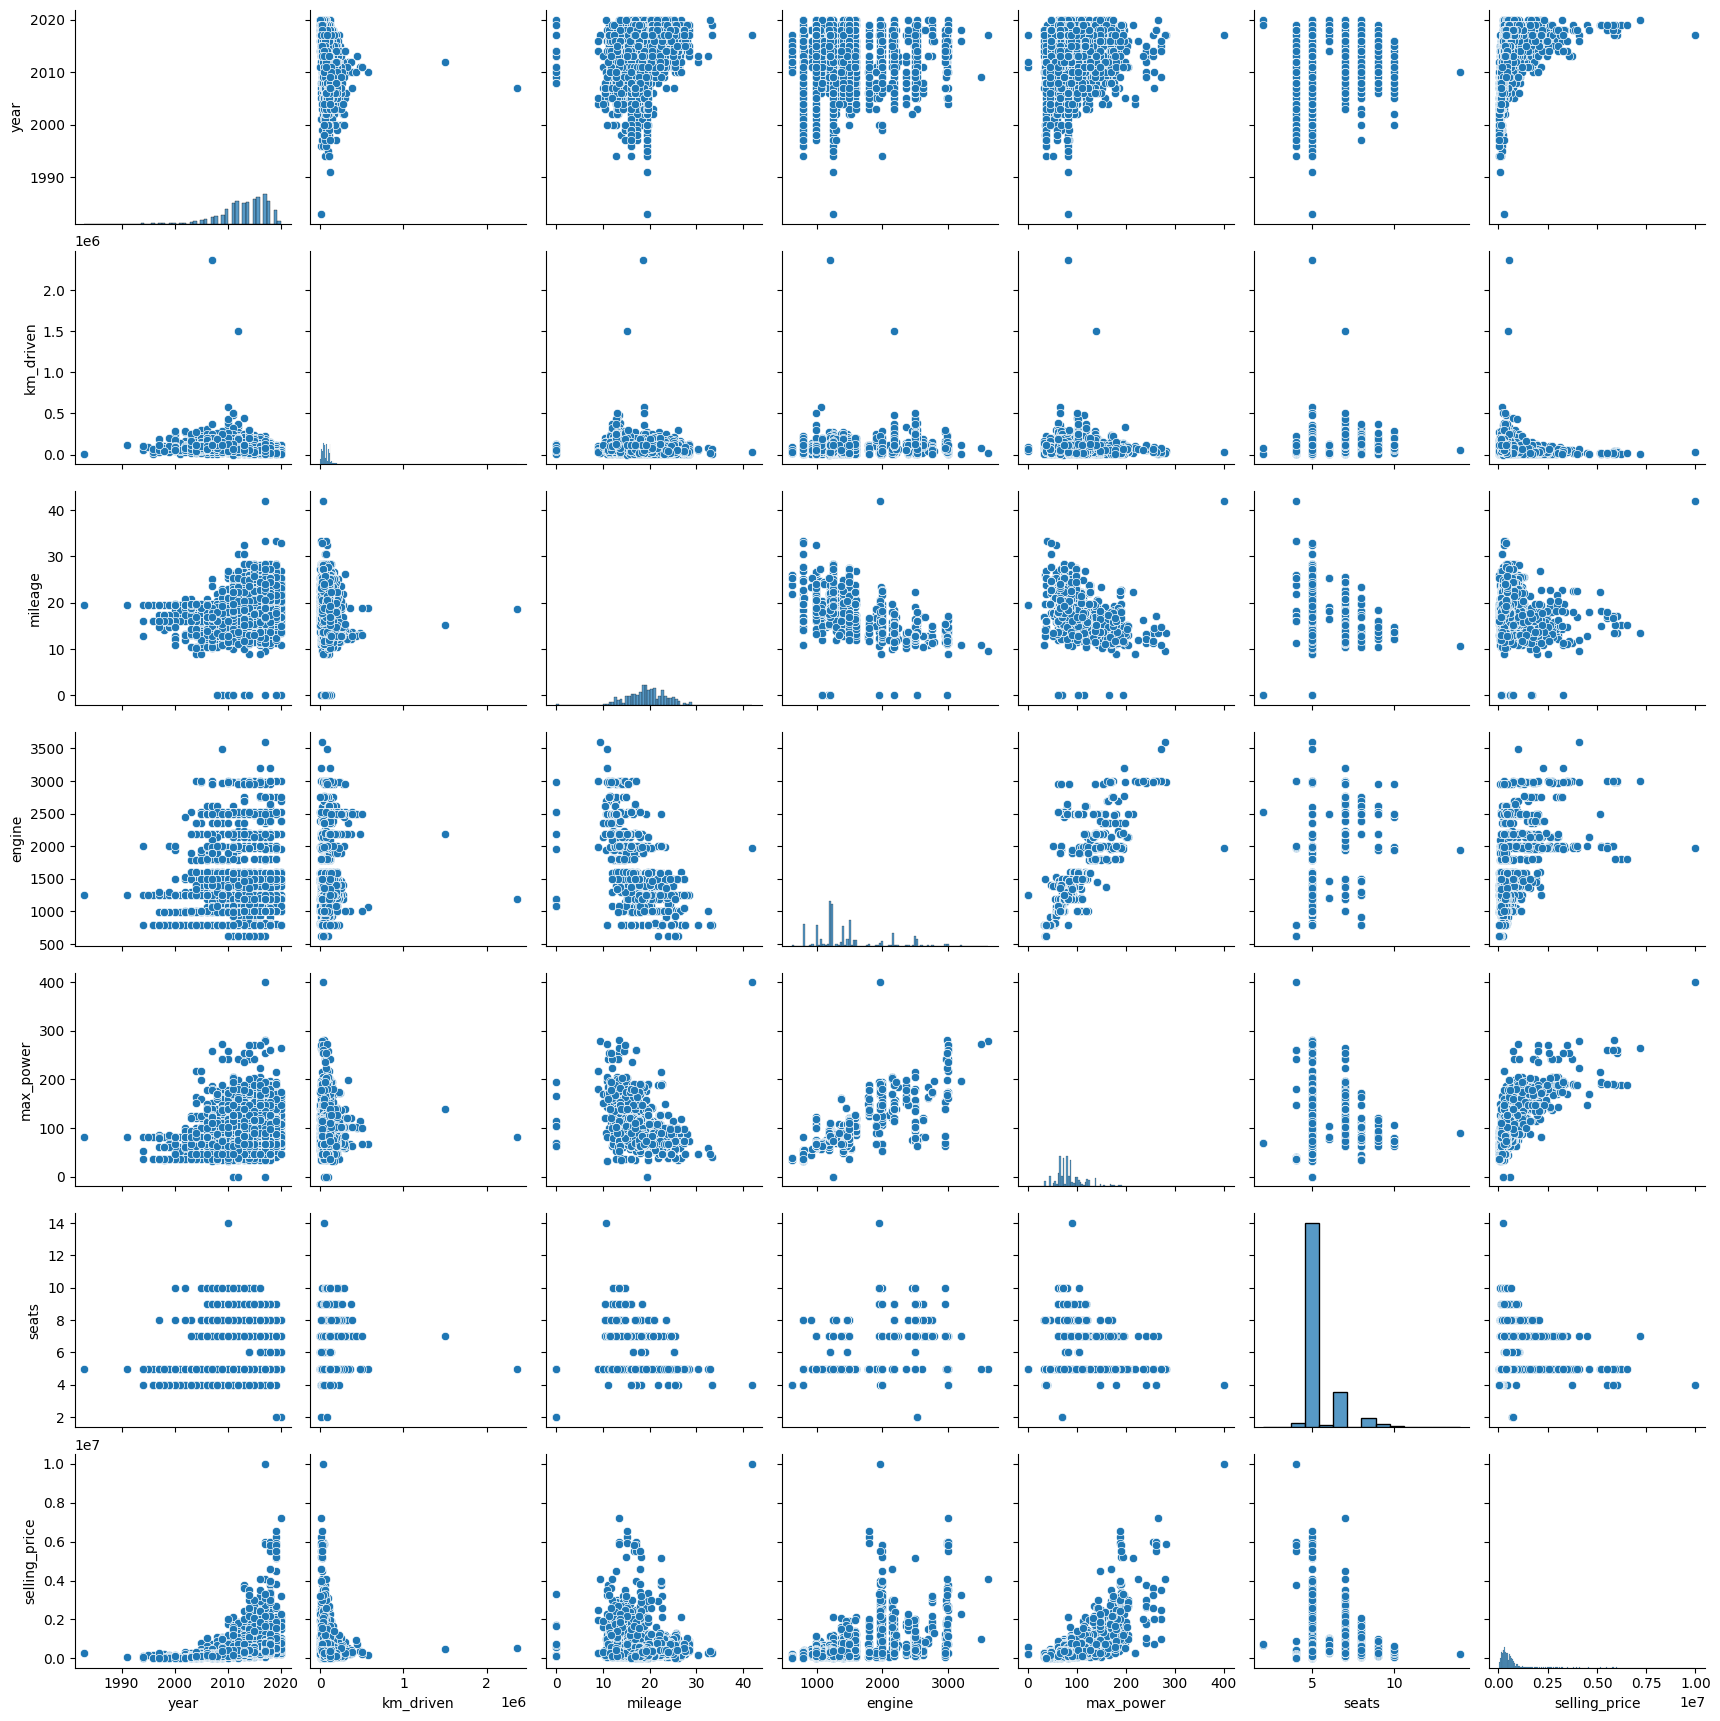

In [40]:
sns.pairplot(df_train)
plt.show()

На основе полученных распредений можно сказать, что есть четко видимая зависимость признаков с целевой переменной, например:
- `selling_price` и `year` (чем старше машина, тем меньше она стоит)
- `selling_price` и `km_driven` (чем меньше пробег, тем дороже стоит машина)
- `selling_price` и `max_power` (чем выше это значение, тем дороже машина)

Да, можно предположить на основе распределений и выдвинуть гипотезу о существовании корреляциях между признаками, однако для наглядности лучше применить матрицу корреляций или sns.heatmap().

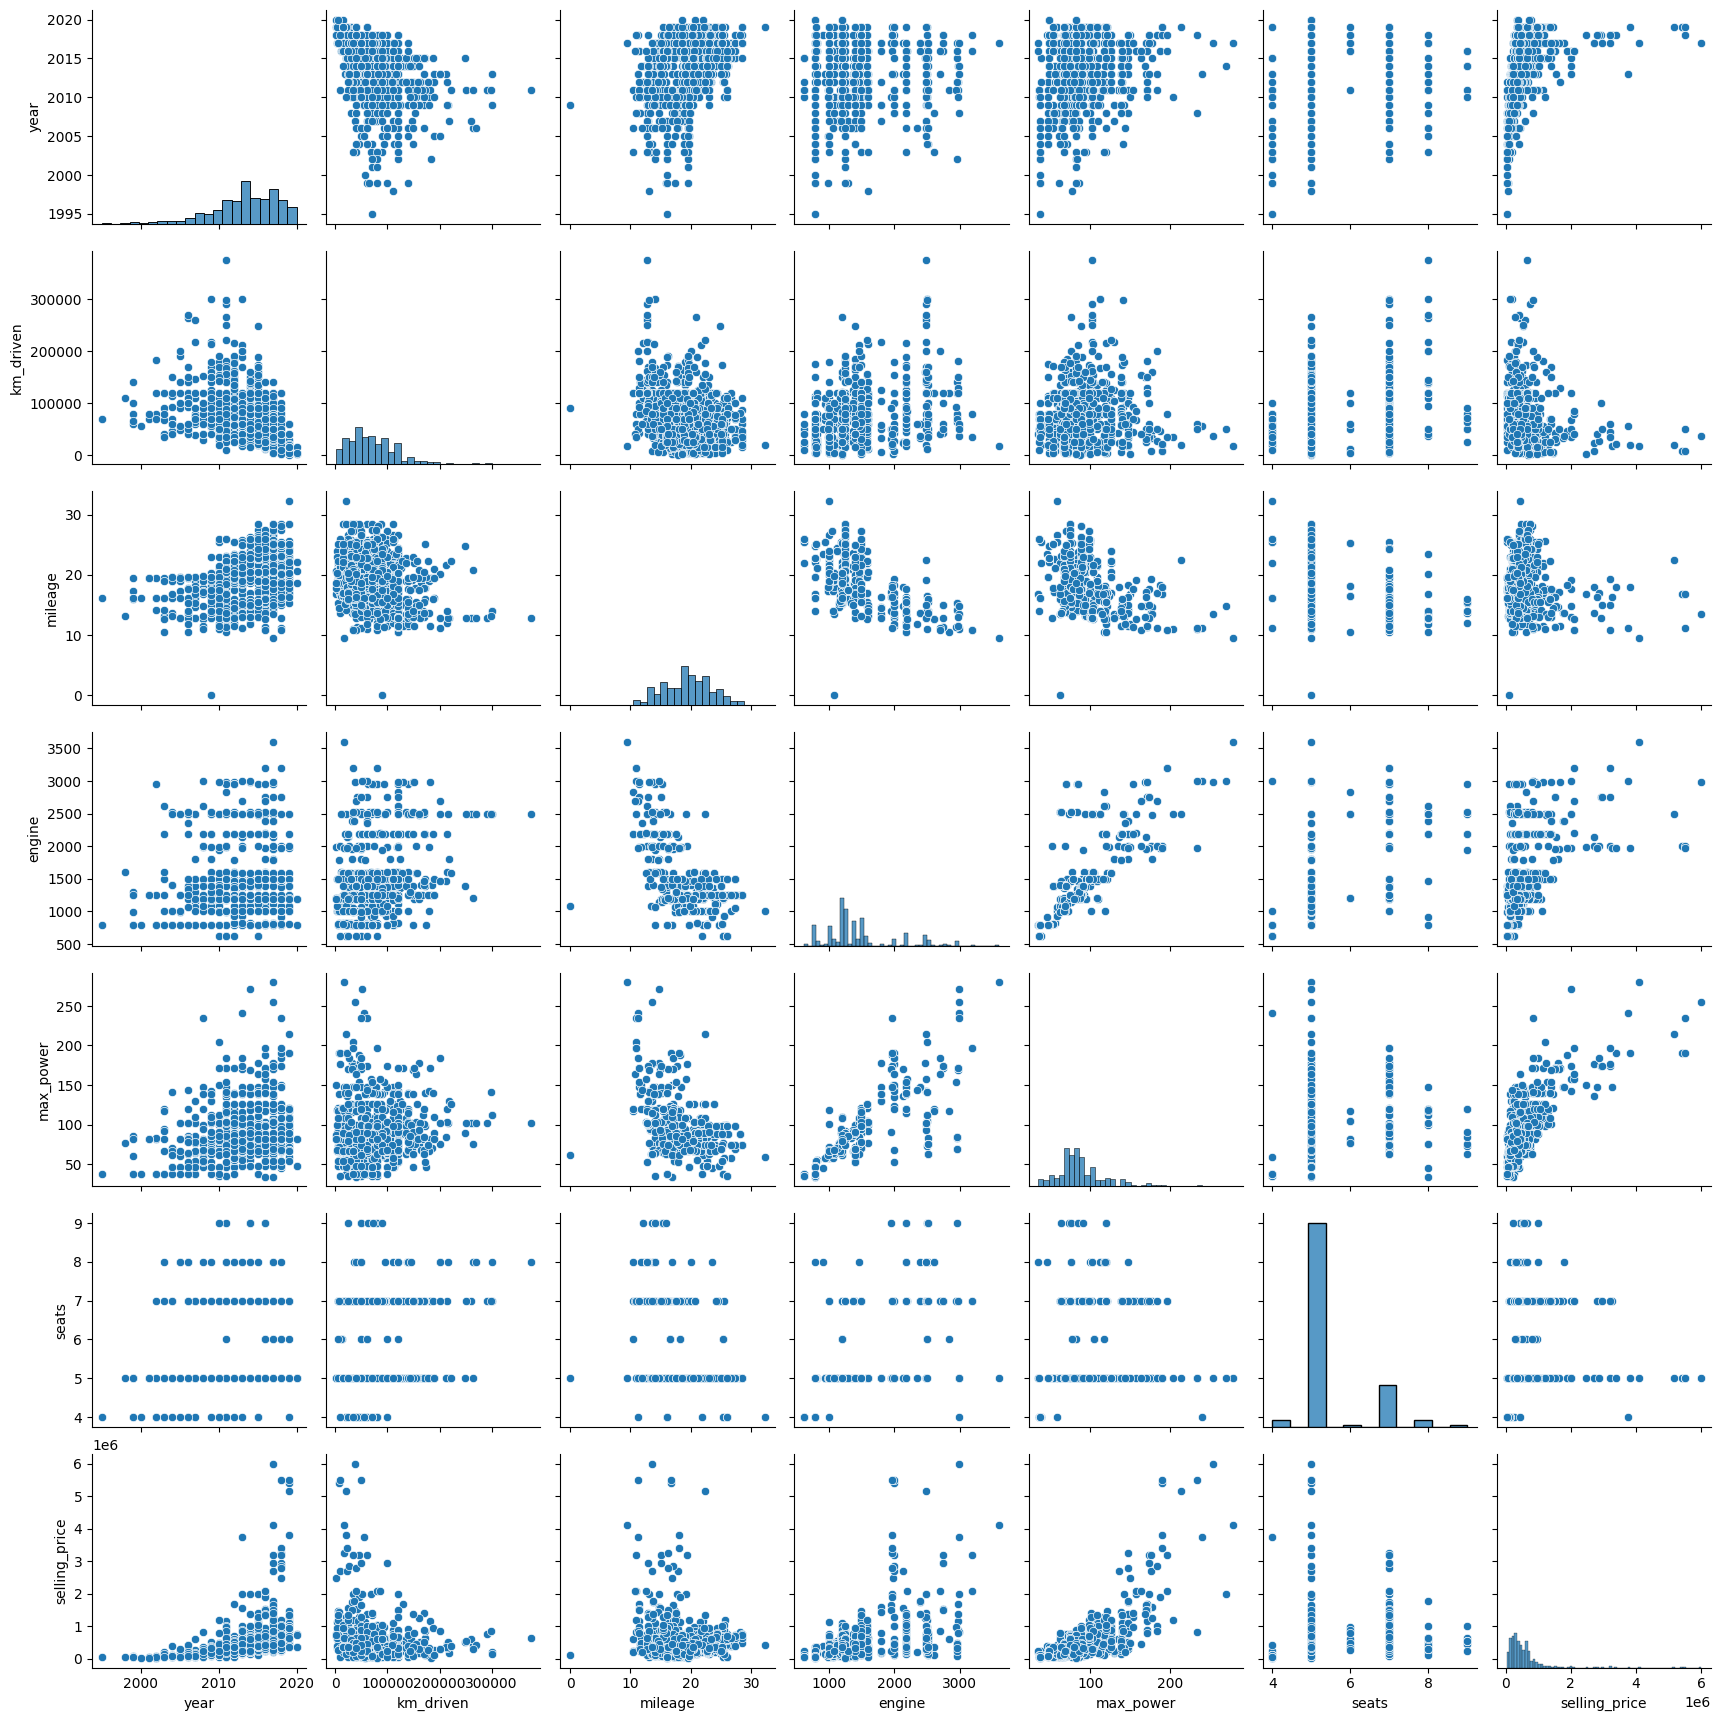

In [41]:
sns.pairplot(df_test)
plt.show()

Да, при разделении на трейн и тест распределения в совокупности оказались похожими.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [42]:
df_train.corr(numeric_only=True)

year  km_driven   mileage    engine  max_power     seats  \
year           1.000000  -0.368966  0.340493  0.002819   0.156904  0.041178   
km_driven     -0.368966   1.000000 -0.181925  0.229766   0.024579  0.192328   
mileage        0.340493  -0.181925  1.000000 -0.573105  -0.373520 -0.451304   
engine         0.002819   0.229766 -0.573105  1.000000   0.681124  0.652172   
max_power      0.156904   0.024579 -0.373520  0.681124   1.000000  0.244123   
seats          0.041178   0.192328 -0.451304  0.652172   0.244123  1.000000   
selling_price  0.427279  -0.164828 -0.105080  0.447672   0.692827  0.149953   

               selling_price  
year                0.427279  
km_driven          -0.164828  
mileage            -0.105080  
engine              0.447672  
max_power           0.692827  
seats               0.149953  
selling_price       1.000000

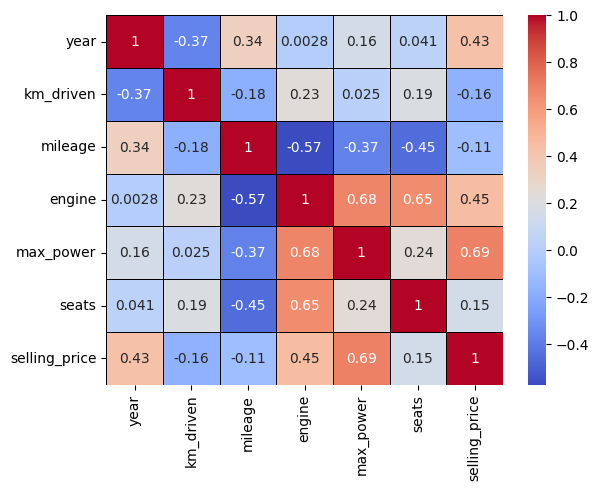

In [43]:
sns.heatmap(df_train.corr(numeric_only=True), cmap="coolwarm", annot=True, linecolor='black', linewidths=0.5)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- `year` и `engine` наименее скоррелированы между собой (0.0028);
- между признаками `engine` и `max_power`, `engine` и `seats`, `max_power` и `selling_price` наблюдается самая сильная положительная линейная зависимость(0.68, 0.65 и 0.69 соответственно);
- опираясь на данные, можно увидеть отрицательную умеренную корреляцию признаков `year` и `km_driven`, что говорит о том, что увеличение значения одной переменной приводит к уменьшению другой. Поэтому можно сказать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Думаю, что все зависимости основные были нарисованы, не хватает только категориальных переменных, поэтому вернусь позже, после того, как их закодирую.

In [44]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [45]:
df_num = df_train.select_dtypes(exclude=['object']).copy()

In [46]:
df_num.head()

year  km_driven  mileage  engine  max_power  seats  selling_price
0  2014     145500    23.40    1248      74.00      5         450000
1  2014     120000    21.14    1498     103.52      5         370000
2  2010     127000    23.00    1396      90.00      5         225000
3  2007     120000    16.10    1298      88.20      5         130000
4  2017      45000    20.14    1197      81.86      5         440000

In [47]:
y_train = df_num['selling_price']
X_train = df_num.drop(['selling_price'], axis=1)

In [48]:
X_train.shape

(5840, 6)

In [49]:
assert X_train.shape == (5840, 6)

In [50]:
df_test_num = df_test.select_dtypes(exclude=['object']).copy()
df_test_num.head()

year  km_driven  mileage  engine  max_power  seats  selling_price
0  2010     168000     14.0    2498      112.0      7         229999
1  2017      25000     21.5    1497      108.5      5         665000
2  2007     218463     12.9    1799      130.0      5         175000
3  2015     173000     25.1    1498       98.6      5         635000
4  2011      70000     16.5    1172       65.0      5         130000

In [51]:
y_test = df_test_num['selling_price']
X_test = df_test_num.drop(['selling_price'], axis=1)

In [52]:
assert X_test.shape == (938, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model1 = LinearRegression()
model1.fit(X_train, y_train)
pred_train1 = model1.predict(X_train)
pred_test1 = model1.predict(X_test)

print(f'MSE (train): {MSE(y_train, pred_train1)}')
print(f'R^2 (train): {r2_score(y_train, pred_train1)}')
print(f'MSE (test): {MSE(y_test, pred_test1)}')
print(f'R^2 (test): {r2_score(y_test, pred_test1)}')

MSE (train): 116873522067.38197
R^2 (train): 0.5922613746055916
MSE (test): 136771748250.24365
R^2 (test): 0.6154975654844881


Получилась интересная ситуация: на тесте метрика $R^2$ показывает лучшие результаты, чем на трейне, а метрика $MSE$, наоборот, лучше на трейне. $MSE$ очень большая, $R^2$ около 0.6, что может говорить о плохой модели.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
pred_train2 = model2.predict(X_train_scaled)
pred_test2 = model2.predict(X_test_scaled)

print(f'MSE (train): {MSE(y_train, pred_train2)}')
print(f'R^2 (train): {r2_score(y_train, pred_train2)}')
print(f'MSE (test): {MSE(y_test, pred_test2)}')
print(f'R^2 (test): {r2_score(y_test, pred_test2)}')

MSE (train): 116873522067.38176
R^2 (train): 0.5922613746055925
MSE (test): 136771748250.24127
R^2 (test): 0.6154975654844947


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [72]:
model2.coef_

array([152769.52382036, -44160.91228719,  28866.51128583,  61194.06736487,
       322810.62419381, -23201.3757305 ])

In [73]:
df_num.columns[np.argmax(abs(model2.coef_).tolist())]

'max_power'

Наиболее информативным оказался признак `max_power`.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [74]:
from sklearn.linear_model import Lasso

lasso1 = Lasso()
lasso1.fit(X_train_scaled, y_train)

pred_train3 = lasso1.predict(X_train_scaled)
pred_test3 = lasso1.predict(X_test_scaled)

print(f'MSE (train): {MSE(y_train, pred_train3)}')
print(f'R^2 (train): {r2_score(y_train, pred_train3)}')
print(f'MSE (test): {MSE(y_test, pred_test3)}')
print(f'R^2 (test): {r2_score(y_test, pred_test3)}')

MSE (train): 116873522077.49564
R^2 (train): 0.592261374570308
MSE (test): 136771905735.46332
R^2 (test): 0.6154971227508743


Качество модели не поменялось, модель также плохо предсказывает стоимость авто, L1-регуляризация не помогла.

In [75]:
lasso1.coef_

array([152769.34124769, -44159.78396416,  28864.62904793,  61189.23533765,
       322811.50816311, -23198.4991645 ])

Как мы видим, L1-регуляризация не занулила ни одного веса в модели. Это может быть связано с тем, что мы не подбирали оптимальные параметры для Lasso, и регуляризация слишком слаба для весов модели. Также возможно, что наша модель сильно переобучена.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [76]:
from sklearn.model_selection import GridSearchCV

lasso2 = Lasso()

param_grid = {
    'alpha': np.arange(20000, 50000, 1000)
}

grid_search = GridSearchCV(lasso2, param_grid, cv=10)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_params

{'alpha': 27000}

In [77]:
lasso2 = Lasso(alpha=best_params['alpha'])
lasso2.fit(X_train_scaled, y_train)

pred_train4 = lasso2.predict(X_train_scaled)
pred_test4 = lasso2.predict(X_test_scaled)

print(f'MSE (train): {MSE(y_train, pred_train4)}')
print(f'R^2 (train): {r2_score(y_train, pred_train4)}')
print(f'MSE (test): {MSE(y_test, pred_test4)}')
print(f'R^2 (test): {r2_score(y_test, pred_test4)}')

MSE (train): 119696891249.74846
R^2 (train): 0.5824114389740178
MSE (test): 143445166594.93835
R^2 (test): 0.5967367787510991


In [78]:
lasso2.coef_

array([145629.25434852, -15415.80572229,      0.        ,      0.        ,
       321459.01245059,     -0.        ])

- Грид-сёрчу пришлось обучать 30*10=300 моделей;
- У лучшей из перебранных моделей коэффициент регуляризации alpha=27000. При такой регуляризации 3 из 6 весов занулились.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [81]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()

param_grid = {
    'alpha': np.arange(10000, 30000, 1000),
    'l1_ratio': np.linspace(0.01, 1., 30)
}

grid_search = GridSearchCV(en, param_grid, cv=10)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_params

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'alpha': 27000, 'l1_ratio': 1.0}

In [82]:
en = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
en.fit(X_train_scaled, y_train)

pred_train5 = en.predict(X_train_scaled)
pred_test5 = en.predict(X_test_scaled)

print(f'MSE (train): {MSE(y_train, pred_train5)}')
print(f'R^2 (train): {r2_score(y_train, pred_train5)}')
print(f'MSE (test): {MSE(y_test, pred_test5)}')
print(f'R^2 (test): {r2_score(y_test, pred_test5)}')

MSE (train): 119696891249.74846
R^2 (train): 0.5824114389740178
MSE (test): 143445166594.93835
R^2 (test): 0.5967367787510991


- Грид-сёрчу пришлось обучать 20\*30*10=6000 моделей;
- У лучшей из перебранных моделей коэффициенты регуляризации alpha=27000 и l1_ratio=1.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [65]:
df_train['name'].describe()

count                       5840
unique                      1924
top       Maruti Swift Dzire VDI
freq                          91
Name: name, dtype: object

In [66]:
df_train = df_train.drop(['name'], axis=1)
df_test = df_test.drop(['name'], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [83]:
# assert X_train_cat.shape == (5840, 10)

In [84]:
# X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [85]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

df_train = pd.get_dummies(df_train, columns=['seats'], drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, columns=['seats'], drop_first=True, dtype=int)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [86]:
df_train['fuel'].nunique(), df_train['seller_type'].nunique(), df_train['transmission'].nunique(), df_train['owner'].nunique()

(4, 3, 2, 5)

Закодируем one-hot-кодированием остальные переменные. Так как у нас есть столбцы закодированные one-hot-кодированием, то воспользуемся MinMaxScaler для стандартизации данных.

In [87]:
df_train = pd.get_dummies(df_train, columns=['fuel'], drop_first=True, dtype=int)
df_train = pd.get_dummies(df_train, columns=['seller_type'], drop_first=True, dtype=int)
df_train = pd.get_dummies(df_train, columns=['transmission'], drop_first=True, dtype=int)
df_train = pd.get_dummies(df_train, columns=['owner'], drop_first=True, dtype=int)

df_test = pd.get_dummies(df_test, columns=['fuel'], drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, columns=['seller_type'], drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, columns=['transmission'], drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, columns=['owner'], drop_first=True, dtype=int)

In [88]:
df_train.shape, df_test.shape

((5840, 24), (938, 21))

In [89]:
y_train = df_train['selling_price']
X_train = df_num.drop(['selling_price'], axis=1)
y_test = df_train['selling_price']
X_test = df_num.drop(['selling_price'], axis=1)

In [90]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {
    'alpha': np.arange(1, 50, 1)
}

grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='r2')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_params

{'alpha': 4}

In [93]:
ridge = Ridge(alpha=best_params['alpha'])
ridge.fit(X_train_scaled, y_train)

pred_train6 = ridge.predict(X_train_scaled)
pred_test6 = ridge.predict(X_test_scaled)

print(f'MSE (train): {MSE(y_train, pred_train6)}')
print(f'R^2 (train): {r2_score(y_train, pred_train6)}')
print(f'MSE (test): {MSE(y_test, pred_test6)}')
print(f'R^2 (test): {r2_score(y_test, pred_test6)}')

MSE (train): 118766323948.6503
R^2 (train): 0.5856579247945443
MSE (test): 118766323948.6503
R^2 (test): 0.5856579247945443


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [109]:
def business_metric(y_true, y_pred):
    # your code here
    count_bus_met = 0
    for true_value, predicted_value in zip(y_true, y_pred):
        metric = (abs(true_value - predicted_value)) / true_value
        if metric <= 0.1:
            count_bus_met += 1
    return count_bus_met / len(y_true)


print(f'1. LinearRegression business metric: {business_metric(y_test, pred_test1)}')
print(f'2. LinearRegression + StandartScaler business metric: {business_metric(y_test, pred_test2)}')
print(f'3. Lasso + StandartScaler business metric: {business_metric(y_test, pred_test3)}')
print(f'4. Lasso + StandartScaler + GridSearchCV business metric: {business_metric(y_test, pred_test4)}')
print(f'5. ElasticNet + StandartScaler + GridSearchCV business metric: {business_metric(y_test, pred_test5)}')
print(f'6. Ridge + category_var + MinMaxScaler + GridSearchCV business metric: {business_metric(y_test, pred_test6)}')

1. LinearRegression business metric: 0.013356164383561644
2. LinearRegression + StandartScaler business metric: 0.013356164383561644
3. Lasso + StandartScaler business metric: 0.013356164383561644
4. Lasso + StandartScaler + GridSearchCV business metric: 0.012671232876712329
5. ElasticNet + StandartScaler + GridSearchCV business metric: 0.012671232876712329
6. Ridge + category_var + MinMaxScaler + GridSearchCV business metric: 0.22534246575342465


Результаты анализа бизнес-метрик различных моделей демонстрируют, что хотя некоторые показатели могут указывать на высокое качество, это не всегда означает, что они будут оптимальными для бизнеса. Так, например, такие действия, как добавление `StandartScaler`, `GridSearchCV`, категориальных переменных и регуляризации приводило к понижению основных метрик $R^2$ и $MSE$. Но с точки зрения бизнеса мы видим, что именно 6 модель с применением всех вышеперечисленных действий показывает лучшие результаты.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

In [110]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(ridge, f)

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Трудно, трудно, хмм... Предположу, что это кот Елены!